1  Loan Prediction :



BUSINESS UNDERSTANDING

Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation. However, they still don’t have assurance if the applicant is able to repay the loan with no difficulties. In order to accomplish this, I organized the whole series into four parts as follows:

Data processing-1: In this first part we show how to clean and remove unnecessary features. Data processing is very time-consuming, but better data would produce a better model. Therefore, careful and very detailed examinations are required to prepare better data. I show how to identify constant features, duplicate features, duplicate rows, and features with a high number of missing values.

Data processing-2: In this part, we manually go through each and every feature selected from part -1. This is the most time-consuming part, but worth it for a better model.

EDA: In this part, we do some exploratory data analysis (EDA) on the features selected in part-1 and 2. A good EDA is required to get a better knowledge of the domain. We need to spend some quality time to find out the relations between the features.


In [39]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")
# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [2]:
# First 10 Rows of training Dataset
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Store total number of observation in training dataset
df_length =len(df)
# Store total number of columns in testing data set
test_col = len(test.columns)

# Understanding the various features (columns) of the dataset.

Our Dataset Include Attributes like 
Loan_ID: Loan id in numbers               
Gender: Male/ Female               
Married: Applicant married (Y/N)                        
Education : Applicant Education (Graduate/ Under Graduate) 
Dependents:	Number of dependents           
Self_Employed: Self employed (Y/N)        
ApplicantIncome: Applicant income      
CoapplicantIncome: Coapplicant income   
LoanAmount : Loan amount in thousands           
Loan_Amount_Term: Term of loan in months      
Credit_History : credit history meets guidelines         
Property_Area : Urban/ Semi Urban/ Rural      
Loan_Status      

In [4]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
dtype: object

In [5]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
df['Type']='Train' 
test['Type']='Test'
fullData = pd.concat([df,test], axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        29
Property_Area          0
Loan_Status          367
Type                   0
dtype: int64

In [6]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [7]:
# Replace missing value of Self_Employed with more frequent category
df['Self_Employed'].fillna('No',inplace=True)

In [8]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

In [9]:
# Summary of numerical variables for training data set
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.855049,1.037459
std,0.386497,0.476373,1.009623,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.352339,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000


1. For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not.

In [10]:
# Get the unique values and their frequency of variable Property_Area
df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

2. Understanding Distribution of Numerical Variables
    - ApplicantIncome
    - LoanAmount

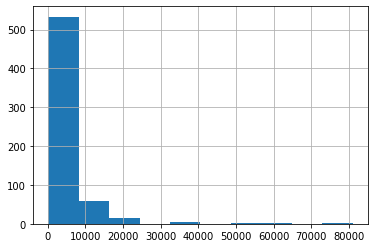

In [32]:
# Box Plot for understanding the distributions and to observe the outliers.
%matplotlib inline

# Histogram of variable ApplicantIncome
df['ApplicantIncome'].hist()

3. The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


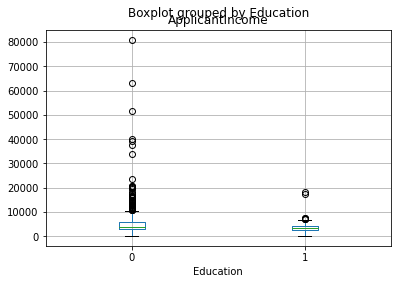

In [12]:
# Box Plot for variable ApplicantIncome by variable Education of training data set
df.boxplot(column='ApplicantIncome', by = 'Education')

4. We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

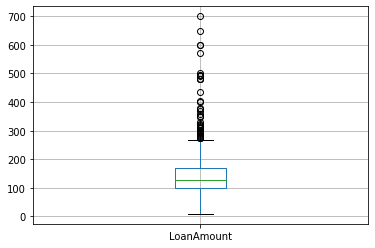

In [14]:
# Box Plot for variable LoanAmount of training data set
df.boxplot(column='LoanAmount')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


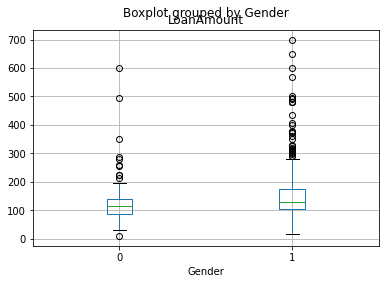

In [15]:
# Box Plot for variable LoanAmount by variable Gender of training data set
df.boxplot(column='LoanAmount', by = 'Gender')

5. LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.

# Understanding Distribution of Categorical Variables

In [16]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


- 422 number of loans were approved.

In [17]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0,82,7,89
1,110,415,525
All,192,422,614


In [18]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# # Loan approval rate for customers having Credit_History (1)
#df['Y'] = pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
#loan_approval_with_Credit_1 = df['Y'][1]
#print(loan_approval_with_Credit_1*100)

- 79.58 % of the applicants whose loans were approved have Credit_History equals to 1.

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,Y,Train
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,N,Train
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,Y,Train
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,Y,Train
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,Y,Train


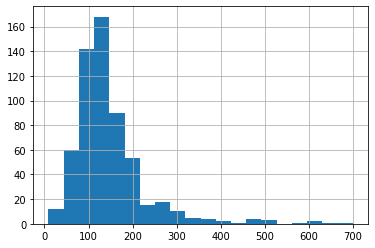

In [20]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

- The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

**Exploring The Dataset**

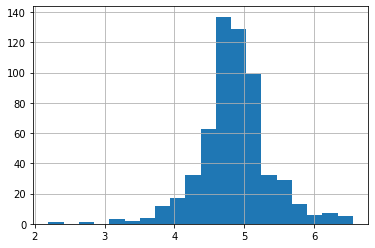

In [21]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

- sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

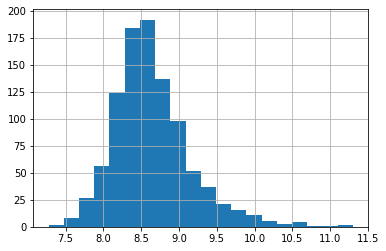

In [22]:
#Create a new column as Total Income

fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20) 

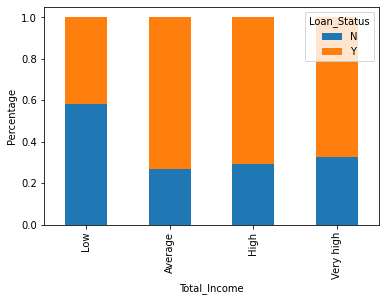

In [33]:
fullData['Total_Income']=fullData['ApplicantIncome']+fullData['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
fullData['Total_Income_bin']=pd.cut(fullData['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(fullData['Total_Income_bin'],fullData['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

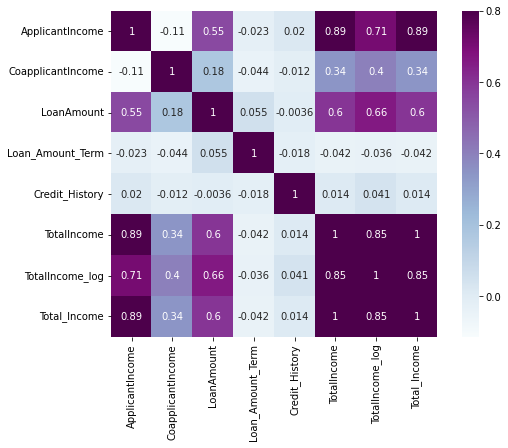

In [40]:
matrix = fullData.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlate variables are (ApplicantIncome — LoanAmount) and (Credit_History — Loan_Status). LoanAmount is also correlated with CoapplicantIncome.